In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

<h2>Whats in this file<h2>
<h2>1. read Data<h2>
<h2>2. figuring out the distribution style of data <h2>
<h2>3. relationship analysis of features using scatterplot, pairplot and correlation heat map <h2>
<h2>4. Feature selection based on relationship observed<h2>
<h2>5. remove features that has less influence on dependent variable<h2>
<h2>6. Copy data to clean excel file<h2>

In [2]:
turbine_data=pd.read_excel('interview data.xlsx')
turbine_data.columns=['TimeStamp','Generated watts','Exhaust temp','Comp Inlet Temp','Comp IGV angle','Comp discharge pressure','Comp discharge temp']


<h1>time series analysis<h1>

In [3]:
turbine_data.TimeStamp.min()

Timestamp('2020-08-24 00:00:00')

In [4]:
turbine_data.TimeStamp.max()

Timestamp('2020-11-17 23:45:00')

In [5]:
turbine_data.TimeStamp.max()-turbine_data.TimeStamp.min()

Timedelta('85 days 23:45:00')

In [6]:
turbine_data.set_index('TimeStamp',inplace=True)

In [7]:
time_series=turbine_data

In [8]:
time_series.resample('D').max()

,Generated watts,Exhaust temp,Comp Inlet Temp,Comp IGV angle,Comp discharge pressure,Comp discharge temp
TimeStamp,,,,,,
2020-08-24,81.369542,1100.229310,104.454431,83.981655,160.361582,688.075691
2020-08-25,80.783906,1100.386769,105.044320,83.989450,159.309222,687.391159
2020-08-26,81.443296,1100.203039,106.761274,83.996642,159.101603,691.511587
2020-08-27,81.363343,1100.254301,108.945331,83.983018,159.152868,694.947591
2020-08-28,80.526915,1100.166687,111.410276,83.975938,158.475076,697.249115
...,...,...,...,...,...,...
2020-11-13,77.592377,1100.107642,101.187847,83.980862,159.858192,690.433939
2020-11-14,78.162594,1100.311494,102.998839,83.994492,159.062631,683.312945
2020-11-15,78.708069,1100.117126,104.746646,83.808995,165.319163,689.912104


Text(0, 0.5, 'Generated Power')

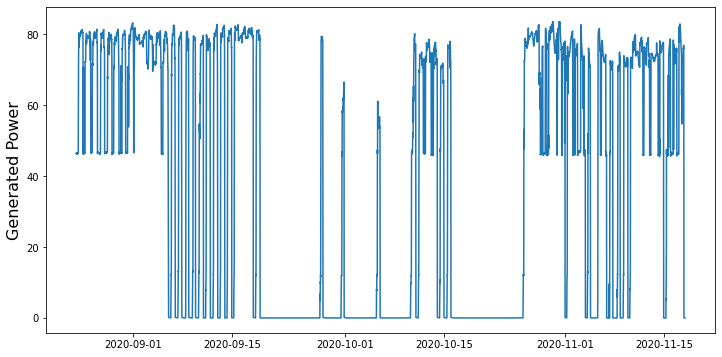

In [9]:
plt.figure(figsize=(12,6))
plt.plot(time_series['Generated watts'])
plt.ylabel('Generated Power', fontsize=16)

<h1> General Distribution analysis <h1>

In [10]:
turbine_data.describe()

,Generated watts,Exhaust temp,Comp Inlet Temp,Comp IGV angle,Comp discharge pressure,Comp discharge temp
count,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000
mean,37.198114,624.547023,79.674343,56.289717,79.599056,400.330157
std,36.421137,467.832104,10.975498,24.042792,74.798557,269.464808
min,-0.033970,59.602717,44.567177,31.964838,-0.785665,62.466905
25%,-0.019440,81.175692,74.197544,32.032597,-0.002007,80.433695
50%,46.082923,1027.955506,79.530186,53.552446,112.050300,606.421915
75%,76.853076,1051.602964,84.896609,83.770569,157.515381,647.899412
max,83.619574,1100.391963,112.423642,83.998651,171.312171,701.815532


<h1> Using histograms to understand distribution of each feature including Target <h1>

In [11]:
sns.set(rc={'figure.figsize':(13,9)})
def plot_histograms(cols):
    total_cols=len(cols)
    width_cols=math.ceil(np.sqrt(total_cols))
    height_rows=math.ceil(total_cols/width_cols)
    fig, axs=plt.subplots(height_rows, width_cols)

    for ind, col in enumerate(cols):
        x=math.floor(ind/width_cols)
        y=ind - x*width_cols

        if height_rows == 1:
            if width_cols == 1:
                sns.distplot(turbine_data[col],kde=False,ax=axs)
            else:
                sns.distplot(turbine_data[col],kde=False,ax=axs[y])
        else:
            sns.distplot(turbine_data[col],kde=False,ax=axs[x, y])


C:\Users\ramya\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


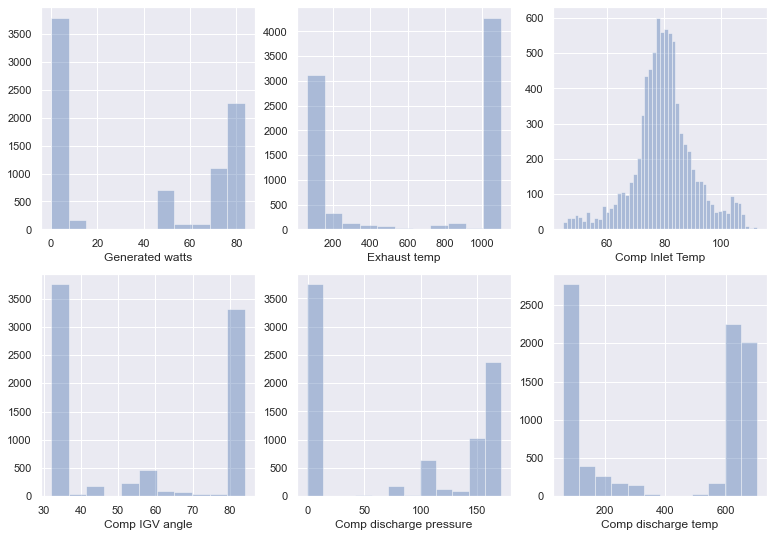

In [12]:
plot_histograms(list(turbine_data.columns))

<h1>Using scatterplot to see relationship between Generated watts and each indivitual feature<H1>

In [13]:
def plot_scatterplot(cols):
    total_cols=len(cols)
    width_cols=math.ceil(np.sqrt(total_cols))
    height_rows=math.ceil(total_cols/width_cols)
    fig, axs=plt.subplots(height_rows, width_cols)

    for ind, col in enumerate(cols):
        x=math.floor(ind/width_cols)
        y=ind - x*width_cols

        if height_rows == 1:
            if width_cols == 1:
                sns.scatterplot(x = turbine_data['Generated watts'], y = turbine_data[col], ax=axs)
            else:
                sns.scatterplot(x = turbine_data['Generated watts'], y = turbine_data[col], ax=axs[y])
        else:
            sns.scatterplot(x = turbine_data['Generated watts'], y = turbine_data[col], ax=axs[x, y])

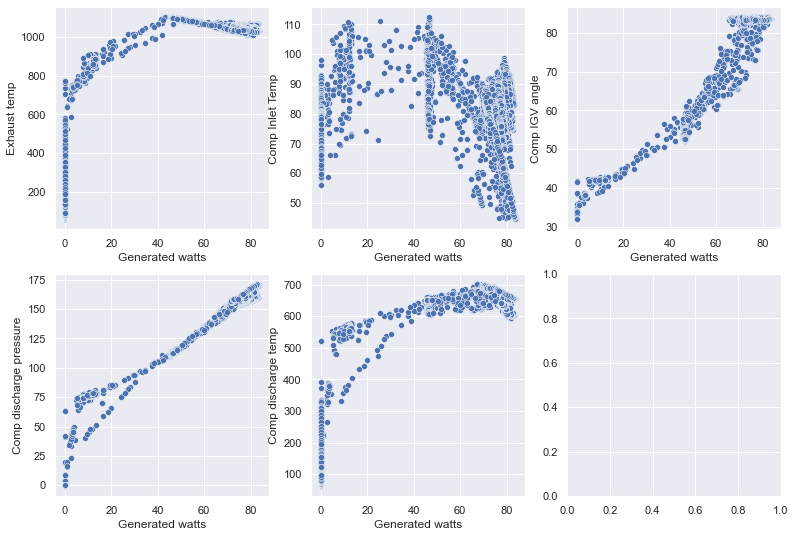

In [14]:
plot_scatterplot(list(turbine_data.columns)[1:])

<H1> Using pairplot to see pairwise scatterplot of features <H1>

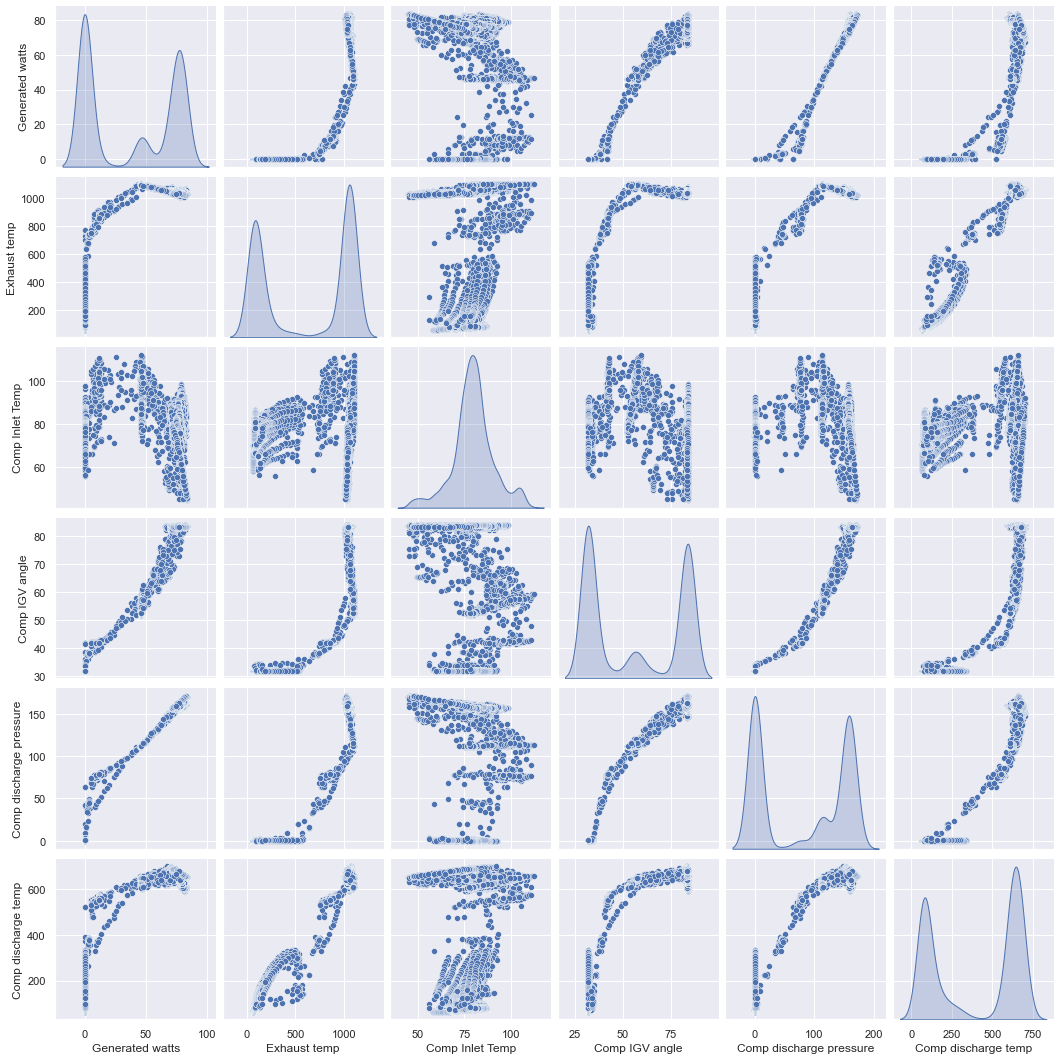

In [15]:
sns.pairplot(turbine_data,diag_kind="kde")

<H1> Using heatmap to see correlation between different features and with 'Generated watts'<H1>

<AxesSubplot:>

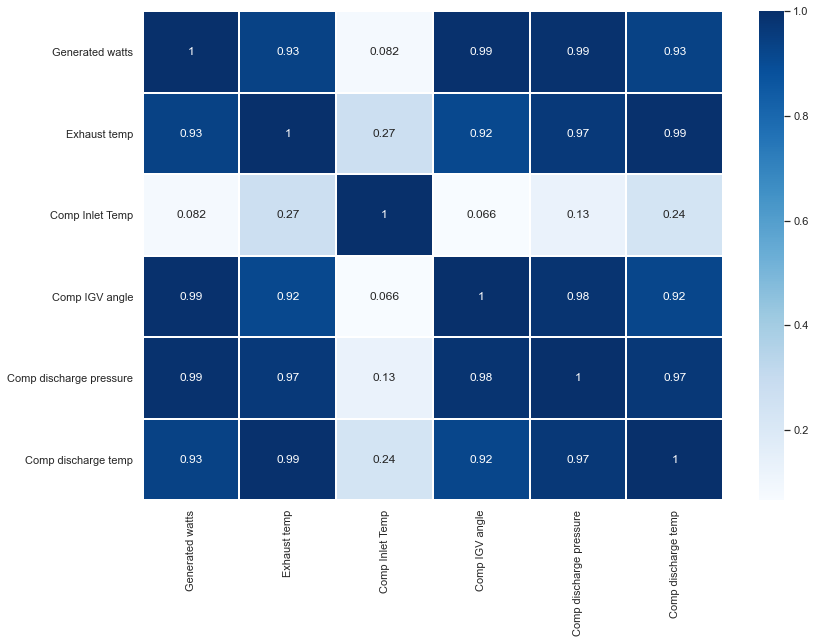

In [16]:
sns.heatmap(turbine_data.corr(),linewidths=2,cmap="Blues",annot=True)

<H1>From the above heatmap;<h1>
<h1>Comp Inlet temp has a low correlation with output; So we can consider ignoring that during feature selection<H1>
<h1>Exhaust temp is very highly correlated with compressor discharge temperature.<h1>
<h1>IGV Angle is highly related to compressor discharge pressure.<h1>
<h1> based on above metrics; I would pick exhaust temperature and IGV angle over discharge temperature and discharge pressure <h1>
